<a href="https://colab.research.google.com/github/yanos84/Tutorials/blob/main/custom_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Regression

Custom Non-Linear Regression Layer

In classical linear regression, the model learns a relationship of the form:

$y=wx+b$

However, many real-world phenomena are non-linear and cannot be modeled well using a straight line.
In this notebook, we will define a custom PyTorch layer that learns a non-linear function of the input:

$y=a⋅sin(bx)+c$

Instead of learning weights inside a standard neural network layer, we will explicitly define the parameters a, b, and c and let PyTorch optimize them using gradient descent.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
class NonLinearRegressionLayer(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize parameters (requires_grad=True by default)
        self.a = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
        self.c = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.a * torch.sin(self.b * x) + self.c

## Generating a Synthetic Dataset

Before training our model, we need data.
We create a synthetic regression dataset using a known non-linear function.

In [ ]:
# True underlying function
true_a, true_b, true_c = 2.0, 1.5, -0.5

torch.manual_seed(0)
x = torch.linspace(-3, 3, 200).unsqueeze(1)
y = true_a * torch.sin(true_b * x) + true_c + 0.2 * torch.randn_like(x)

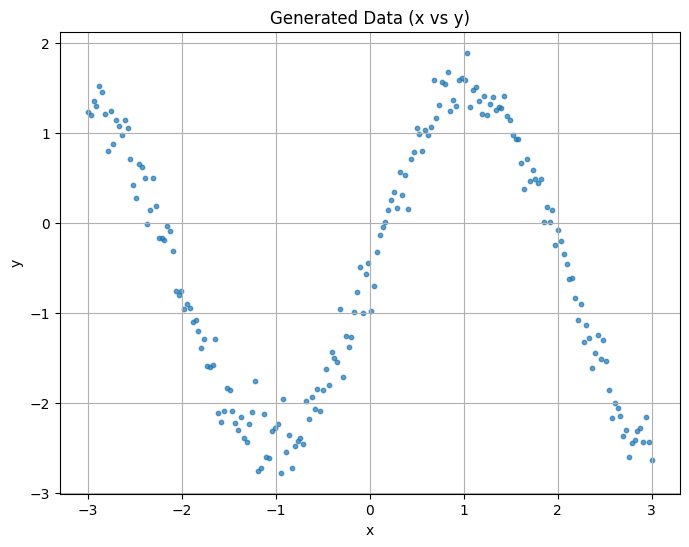

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy(), s=10, alpha=0.7)
plt.title('Generated Data (x vs y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

We create then the model and we determine the optimizer and the loss function.

In [ ]:
model = NonLinearRegressionLayer()
optimizer = optim.SGD(model.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [ ]:
loss_history = []

for epoch in range(2000):
    #optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()        # ← PyTorch computes gradients automatically
    optimizer.step()       # ← Update parameters

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item():.4f}")


Epoch 0, Loss = 2.2161
Epoch 200, Loss = 1.6858
Epoch 400, Loss = 1.4815
Epoch 600, Loss = 1.6588
Epoch 800, Loss = 0.8271
Epoch 1000, Loss = 0.3750
Epoch 1200, Loss = 0.6898
Epoch 1400, Loss = 1.6102
Epoch 1600, Loss = 0.7696
Epoch 1800, Loss = 0.3422
Epoch 2000, Loss = 1.2765
Epoch 2200, Loss = 0.3264
Epoch 2400, Loss = 0.4222
Epoch 2600, Loss = 1.2899
Epoch 2800, Loss = 1.4899
Epoch 3000, Loss = 0.5292
Epoch 3200, Loss = 0.0382
Epoch 3400, Loss = 0.6683
Epoch 3600, Loss = 1.5037
Epoch 3800, Loss = 1.2983
Epoch 4000, Loss = 0.4169
Epoch 4200, Loss = 0.0671
Epoch 4400, Loss = 0.7763
Epoch 4600, Loss = 1.5017
Epoch 4800, Loss = 1.2875
Epoch 5000, Loss = 0.4021
Epoch 5200, Loss = 0.1046
Epoch 5400, Loss = 0.7756
Epoch 5600, Loss = 1.5150
Epoch 5800, Loss = 1.1876
Epoch 6000, Loss = 0.4502
Epoch 6200, Loss = 0.1125
Epoch 6400, Loss = 0.8380
Epoch 6600, Loss = 1.5198
Epoch 6800, Loss = 1.1616
Epoch 7000, Loss = 0.2608
Epoch 7200, Loss = 0.2431
Epoch 7400, Loss = 1.2111
Epoch 7600, Loss = 

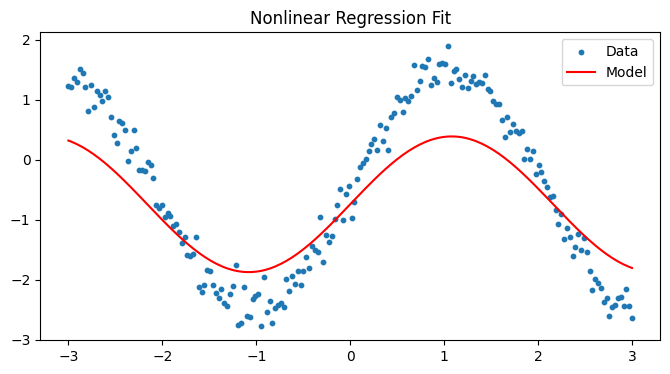

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(x.detach(), y.detach(), s=10, label="Data")
plt.plot(x.detach(), model(x).detach(), color='red', label="Model")
plt.legend()
plt.title("Nonlinear Regression Fit")
plt.show()


In [ ]:
print("Learned parameters:")
print("a =", model.a.item())
print("b =", model.b.item())
print("c =", model.c.item())


Learned parameters:
a = 1.1299517154693604
b = 1.4540143013000488
c = -0.741829514503479
